In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.types import IntegerType, TimestampType

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
df = spark.read.csv("Dataset.csv", header=True, inferSchema=True)

In [4]:
df.show()

+---+--------------------+--------+----------+-----+-------------+
| id|         sugar_level|calories|    weight|  fat|   food_color|
+---+--------------------+--------+----------+-----+-------------+
|  1|145.7699999999999...| 764 cal|1745.73 gr|46 gr| Lemon Yellow|
|  2|-4.60000000000000...| 262 cal|1903.09 gr|24 gr|    Navy Blue|
|  3|            95.81 gr| 448 cal|1539.14 gr|27 gr|Sunset Yellow|
|  4|           100.16 gr| 375 cal| 746.22 gr|11 gr|Sunset Yellow|
|  5|-8.56000000000000...|  93 cal| 134.08 gr|26 gr|   Sunset Red|
|  6|           140.24 gr| 651 cal|1989.74 gr|24 gr|       Purple|
|  7|35.26000000000000...| 331 cal|1994.42 gr|32 gr|    Navy Blue|
|  8|            35.47 gr| 245 cal| 438.82 gr|28 gr|        Green|
|  9|59.76000000000000...| 771 cal|  31.05 gr|24 gr|       Coffee|
| 10|-7.60999999999999...|  99 cal|  157.4 gr| 4 gr|       Purple|
| 11|96.58000000000001 gr| 506 cal|  169.6 gr|26 gr|Sunset Yellow|
| 12|5.180000000000007 gr| 459 cal| 169.26 gr|19 gr|   Sunset 

In [5]:
df = df.select("sugar_level", "calories", "fat", "food_color")

In [6]:
df.show()

+--------------------+--------+-----+-------------+
|         sugar_level|calories|  fat|   food_color|
+--------------------+--------+-----+-------------+
|145.7699999999999...| 764 cal|46 gr| Lemon Yellow|
|-4.60000000000000...| 262 cal|24 gr|    Navy Blue|
|            95.81 gr| 448 cal|27 gr|Sunset Yellow|
|           100.16 gr| 375 cal|11 gr|Sunset Yellow|
|-8.56000000000000...|  93 cal|26 gr|   Sunset Red|
|           140.24 gr| 651 cal|24 gr|       Purple|
|35.26000000000000...| 331 cal|32 gr|    Navy Blue|
|            35.47 gr| 245 cal|28 gr|        Green|
|59.76000000000000...| 771 cal|24 gr|       Coffee|
|-7.60999999999999...|  99 cal| 4 gr|       Purple|
|96.58000000000001 gr| 506 cal|26 gr|Sunset Yellow|
|5.180000000000007 gr| 459 cal|19 gr|   Sunset Red|
|100.4199999999999...| 346 cal|15 gr|        Black|
|116.7899999999999...| 436 cal|36 gr|Sunset Yellow|
|            86.53 gr| 312 cal|38 gr|        Green|
|           142.05 gr| 430 cal|36 gr| Lemon Yellow|
|97.00999999

In [7]:
df = df.withColumn("sugar_level", regexp_replace("sugar_level", "gr", ""))
df = df.withColumn("calories", regexp_replace("calories", "cal", ""))
df = df.withColumn("fat", regexp_replace("fat", "gr", ""))

In [8]:
df.show()

+--------------------+--------+---+-------------+
|         sugar_level|calories|fat|   food_color|
+--------------------+--------+---+-------------+
| 145.76999999999998 |    764 |46 | Lemon Yellow|
|-4.6000000000000085 |    262 |24 |    Navy Blue|
|              95.81 |    448 |27 |Sunset Yellow|
|             100.16 |    375 |11 |Sunset Yellow|
| -8.560000000000002 |     93 |26 |   Sunset Red|
|             140.24 |    651 |24 |       Purple|
| 35.260000000000005 |    331 |32 |    Navy Blue|
|              35.47 |    245 |28 |        Green|
| 59.760000000000005 |    771 |24 |       Coffee|
| -7.609999999999999 |     99 | 4 |       Purple|
|  96.58000000000001 |    506 |26 |Sunset Yellow|
|  5.180000000000007 |    459 |19 |   Sunset Red|
| 100.41999999999999 |    346 |15 |        Black|
| 116.78999999999999 |    436 |36 |Sunset Yellow|
|              86.53 |    312 |38 |        Green|
|             142.05 |    430 |36 | Lemon Yellow|
|  97.00999999999999 |    262 |31 |         Rose|


In [9]:
df = df.withColumn("food_color", 
                               when(df["food_color"] == "Black", 0).
                               when(df["food_color"] == "Coffee", 1).
                               when(df["food_color"] == "Grass Green", 2).
                               when(df["food_color"] == "Green", 3).
                               when(df["food_color"] == "Lemon Yellow", 4).
                               when(df["food_color"] == "Navy Blue", 5).
                               when(df["food_color"] == "Purple", 6).
                               when(df["food_color"] == "Rose", 7).
                               when(df["food_color"] == "Sunset Red", 8).
                               when(df["food_color"] == "Sunset Yellow", 9)
                              )

In [10]:
df.show()

+--------------------+--------+---+----------+
|         sugar_level|calories|fat|food_color|
+--------------------+--------+---+----------+
| 145.76999999999998 |    764 |46 |         4|
|-4.6000000000000085 |    262 |24 |         5|
|              95.81 |    448 |27 |         9|
|             100.16 |    375 |11 |         9|
| -8.560000000000002 |     93 |26 |         8|
|             140.24 |    651 |24 |         6|
| 35.260000000000005 |    331 |32 |         5|
|              35.47 |    245 |28 |         3|
| 59.760000000000005 |    771 |24 |         1|
| -7.609999999999999 |     99 | 4 |         6|
|  96.58000000000001 |    506 |26 |         9|
|  5.180000000000007 |    459 |19 |         8|
| 100.41999999999999 |    346 |15 |         0|
| 116.78999999999999 |    436 |36 |         9|
|              86.53 |    312 |38 |         3|
|             142.05 |    430 |36 |         4|
|  97.00999999999999 |    262 |31 |         7|
|             150.36 |    384 |19 |         4|
|            

In [11]:
df = df.withColumn("sugar_level", regexp_replace("sugar_level", " ", ""))
df = df.withColumn("calories", regexp_replace("calories", " ", ""))
df = df.withColumn("fat", regexp_replace("fat", " ", ""))

In [12]:
df = df.withColumn("sugar_level", df["sugar_level"].cast(IntegerType()))
df = df.withColumn("calories", df["calories"].cast(IntegerType()))
df = df.withColumn("fat", df["fat"].cast(IntegerType()))

In [13]:
df = df.dropna()

In [14]:
cols = df.columns

df = VectorAssembler(inputCols=cols, outputCol="FeaturesVector").transform(df)



In [15]:
df = StandardScaler(inputCol="FeaturesVector", outputCol="features").fit(df).transform(df)

In [16]:
kmeans = KMeans().setK(2)
model = kmeans.fit(df).transform(df)

In [17]:
model.show()

+-----------+--------+---+----------+--------------------+--------------------+----------+
|sugar_level|calories|fat|food_color|      FeaturesVector|            features|prediction|
+-----------+--------+---+----------+--------------------+--------------------+----------+
|        145|     764| 46|         4|[145.0,764.0,46.0...|[3.07634519530285...|         0|
|         -4|     262| 24|         5|[-4.0,262.0,24.0,...|[-0.0848646950428...|         1|
|         95|     448| 27|         9|[95.0,448.0,27.0,...|[2.01553650726738...|         0|
|        100|     375| 11|         9|[100.0,375.0,11.0...|[2.12161737607093...|         1|
|         -8|      93| 26|         8|[-8.0,93.0,26.0,8.0]|[-0.1697293900856...|         1|
|        140|     651| 24|         6|[140.0,651.0,24.0...|[2.97026432649930...|         0|
|         35|     331| 32|         5|[35.0,331.0,32.0,...|[0.74256608162482...|         1|
|         35|     245| 28|         3|[35.0,245.0,28.0,...|[0.74256608162482...|         1|

In [18]:
import matplotlib.pyplot as plt

In [19]:
pandas = model.toPandas()

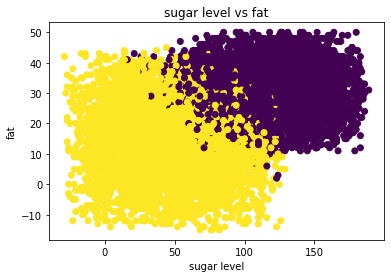

In [22]:
plt.title("sugar level vs fat")
plt.scatter(pandas["sugar_level"], pandas["fat"], c=pandas["prediction"])
plt.xlabel("sugar level")
plt.ylabel("fat")

plt.show()